# Logistic Regration

use to solve **classification problem**<br>
Predicted value is CATEGORICAL <br>
event existing such as pass/fail, win/lose, alive/dead or healthy/sick , email span YES/NO  , buy or not $\:\:\:$  #BINARY Classifiation <br> 
image contains a cat, dog, lion   $\:\:\:$  # MULTICLASS Classifiation


#### use Logistic regression on Binary classification problem

**Sigmoid or Logit Function**
<img src="https://miro.medium.com/max/822/1*6X0DW0fUTT2Kd3_fU_1ZsA.png" width="300" height="300" >
<br>
y_cap = sigmoid <br>
e = Euler's Number (2.71828) <br>
Sigmoid Function converts input into  ( 0 TO 1 ) <br>
As we know that $\:\:\:\:\:$  Y = mX + C
<img src="https://rajputhimanshu.files.wordpress.com/2018/03/linear_vs_logistic_regression.jpg" width="700" height="400" >

## Binary Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame({
    'age' : [20,15,22,34,42,32,33,28,29,65,67,69,63,65,59,60,99],
    'insurance' : [0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,1,1]
})
df.head()

,age,insurance
0,20,0
1,15,0
2,22,0
3,34,1
4,42,0


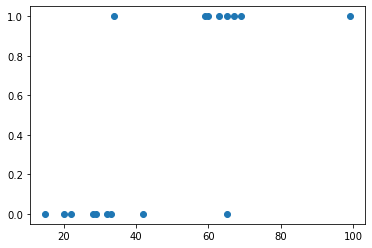

In [3]:
plt.scatter(df.age, df.insurance)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.insurance, test_size=0.1)

In [5]:
X_test

,age
0,20
1,15


In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [7]:
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
model.predict(X_test)

array([0, 0], dtype=int64)

In [9]:
model.score(X_test,y_test)        # model is 50% accurate

1.0

In [10]:
model.predict_proba(X_test)              # person with age 34     0.98219087 not buy

array([[0.95607397, 0.04392603],
       [0.97413774, 0.02586226]])

#### use Logistic regression on Multiclass classification problem

**Hand Written digits Recognition**

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()

In [12]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [13]:
digits.data[0]                                # Printing one Digit from DataSet

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

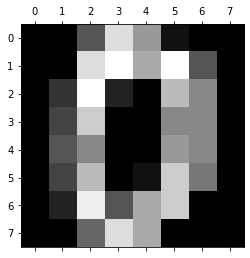

In [14]:
plt.gray()
plt.matshow(digits.images[0])

In [15]:
digits.target[0:5]                          # Printing answers of 1st five elements in List

array([0, 1, 2, 3, 4])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [17]:
len(X_train)

1437

In [18]:
len(X_test)

360

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [20]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
model.score(X_test, y_test)

0.975

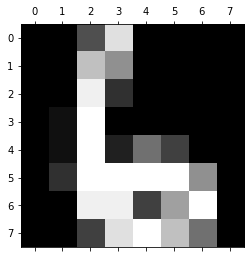

In [22]:
plt.matshow(digits.images[67])

In [23]:
digits.target[67]

6

In [24]:
model.predict([digits.data[67]])

array([6])

In [25]:
model.predict(digits.data[0:5])          # predicting list

array([0, 1, 2, 3, 4])

In [26]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  1,  0,  0,  0,  1],
       [ 0,  2,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 28]], dtype=int64)

Text(69.0, 0.5, 'Truth')

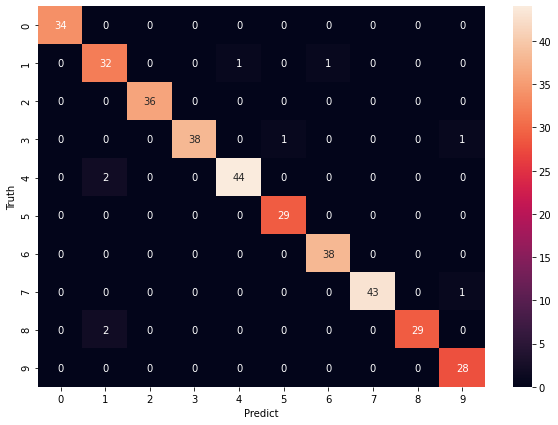

In [27]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')

## Logistic Regression using Decision Tree

**if we cann't split data in 2 part (by single line) we need to make more parts of Data** 

*While selectiong ordering of features check for less **Randomness**(entropy)*

In [30]:
import pandas as pd
df = pd.read_csv('company.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales,btech,0
1,google,sales,mtech,0
2,google,business,btech,1
3,google,business,mtech,1
4,google,computer,btech,0
5,google,computer,mtech,1
6,amazon,sales,mtech,0
7,amazon,computer,btech,0
8,amazon,business,btech,0
9,amazon,business,mtech,1


In [31]:
inputs = df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [34]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales,btech,2,2,0
1,google,sales,mtech,2,2,1
2,google,business,btech,2,0,0
3,google,business,mtech,2,0,1
4,google,computer,btech,2,1,0


In [35]:
inputs_n = inputs.drop(['company', 'job', 'degree'], axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [36]:
from sklearn import tree

In [37]:
model = tree.DecisionTreeClassifier()

In [38]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [39]:
model.score(inputs_n, target)

1.0

In [40]:
model.predict([[2,2,1]])

array([0], dtype=int64)